<a href="https://colab.research.google.com/github/sonovman/GNN-from-scratch/blob/main/Part1_Graph_Neural_Networks_Intro_Study_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Think Graph Neural Networks (GNN) are hard to understand?**

**Think Graph Neural Networks (GNN) are hard to understand?**

**Part 1** (https://youtu.be/YdGN-J322y4):
-----------------------------
- Fundamentals of Graph
- Mathematics of Graph
- Introduction to NetworkX Python Package
- Graph Programming with NetworkX
- Introduction to GNN
- Relationship between GNN and CNN
- Introduction to PyG (pytorch_geometric)
- Graph Visualization Tools - yEd
- Various Graph Data Manipulation

**Google colab notebooks** 
https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks

**Part 1 PDF document:**
https://github.com/prodramp/DeepWorks/blob/main/GraphNeuralNetworks/Graph%20Neural%20Networks-Part1.pdf

## **Graph Neural Networks**

In [ ]:
!python -c "import torch; print(torch.version.cuda)"

11.3


In [ ]:
# PyTorch version
!python -c "import torch; print(torch.__version__)"

1.12.1+cu113


In [ ]:
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.12.1+cu113.html   # 파이토치 버전 확인
#!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.10.0+cu111.html 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html


In [ ]:
# 패키지 설치버전을 앞에서 확인 파이토치 버전과 동일하게 수정해주어야 함

!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.12.1+cu113.html
#!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.10.0+cu111.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://data.pyg.org/whl/torch-1.12.1+cu113.html


In [ ]:
!pip install torch-geometric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
# print torch version
print(torch.__version__)

1.12.1+cu113


In [ ]:
from torch_geometric.data import Data

In [ ]:
edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

In [ ]:
edge_index

tensor([[0, 1, 1, 2],
        [1, 0, 2, 1]])

In [ ]:
x

tensor([[-1.],
        [ 0.],
        [ 1.]])

In [ ]:
data = Data(x=x, edge_index=edge_index)

In [ ]:
# data.x: Node feature matrix with shape [num_nodes, num_node_features]
# data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

data

Data(x=[3, 1], edge_index=[2, 4])

In [ ]:
from torch_geometric.utils import to_networkx

In [ ]:
G = to_networkx(data)

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

In [ ]:
import networkx as nx

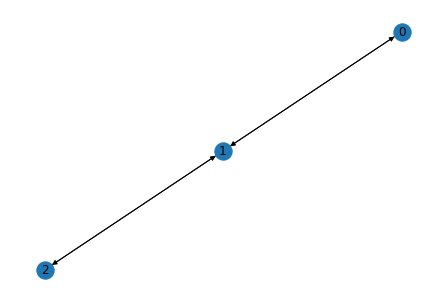

In [ ]:
nx.draw(G,  with_labels = True)

# tensor([[0, 1, 1, 2],
#         [1, 0, 2, 1]]) : 
# 열 기준으로 위 아래 데이터 0 to 1, 1 to 0, 1 to 2, 2 to 1

In [ ]:
data.keys

['edge_index', 'x']

In [ ]:
for key, item in data:
  print(f'{key} found in data')

x found in data
edge_index found in data


In [ ]:
'edge_attr' in data

False

In [ ]:
data.num_nodes

3

In [ ]:
data.num_edges

4

In [ ]:
data.num_node_features

1

In [ ]:
data.has_isolated_nodes()

False

In [ ]:
data.has_self_loops()

False

In [ ]:
data.is_directed()

False

# **Another Example:**

In [ ]:
edge_index = torch.tensor([[1, 2, 3, 4],
                           [5, 6, 7, 8]], dtype=torch.long)

x = torch.tensor([ [[1], [1], [1]], [[3],[3],[3]] ], dtype=torch.float)
#x = torch.tensor([[1], [1], [1]], dtype=torch.float)

# data.x: Node feature matrix with shape [num_nodes, num_node_features]
# data.edge_index: Graph connectivity in COO format with shape [2, num_edges] and type torch.long

In [ ]:
edge_index

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [ ]:
edge_index.ndim

2

In [ ]:
x

tensor([[[1.],
         [1.],
         [1.]],

        [[3.],
         [3.],
         [3.]]])

In [ ]:
x.ndim

3

In [ ]:
# create graph data object
data = Data(x=x, edge_index=edge_index)
print(data)

Data(x=[2, 3, 1], edge_index=[2, 4])


In [ ]:
# check number of edges of the graph
print(data.num_edges)

4


In [ ]:
# check number of nodes of the graph
print(data.num_nodes)

2


In [ ]:
# check number of features of the graph
# data.x: Node feature matrix with shape [num_nodes, num_node_features]

print(data.num_features)

1


In [ ]:
# check if graph is directed
print(data.is_directed())

True


In [ ]:
G = to_networkx(data)

In [ ]:
type(G)

networkx.classes.digraph.DiGraph

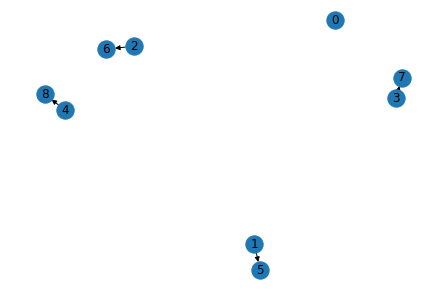

In [ ]:
nx.draw(G, with_labels = True)

# [유의] node 0 은 추가한 적이 없지만 자동으로 추가되어 있음

In [ ]:
#edge_index = torch.tensor([[1, 2, 3, 4],
#                           [5, 6, 7, 8]])

print(nx.is_weighted(G))
print(nx.is_directed(G))
print(G.order())
print(G.number_of_edges())
print(G.number_of_nodes())
print(G.edges)

False
True
9
4
9
[(1, 5), (2, 6), (3, 7), (4, 8)]


In [ ]:
print(G.nodes)
# [유의] node 0 은 edge index add할 때 없었으나 node 0 이 추가되어 있음

[0, 1, 5, 2, 6, 3, 7, 4, 8]


In [ ]:
nx.write_graphml(G, 'demo-8.graphml')

In [ ]:
for line in nx.generate_graphml(G): 
  print(line)

<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd">
  <graph edgedefault="directed">
    <node id="0" />
    <node id="1" />
    <node id="5" />
    <node id="2" />
    <node id="6" />
    <node id="3" />
    <node id="7" />
    <node id="4" />
    <node id="8" />
    <edge source="1" target="5" />
    <edge source="2" target="6" />
    <edge source="3" target="7" />
    <edge source="4" target="8" />
  </graph>
</graphml>


In [ ]:
!cat '/content/demo-8.graphml'

<?xml version='1.0' encoding='utf-8'?>
<graphml xmlns="http://graphml.graphdrawing.org/xmlns" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://graphml.graphdrawing.org/xmlns http://graphml.graphdrawing.org/xmlns/1.0/graphml.xsd"><graph edgedefault="directed"><node id="0"/>
<node id="1"/>
<node id="5"/>
<node id="2"/>
<node id="6"/>
<node id="3"/>
<node id="7"/>
<node id="4"/>
<node id="8"/>
<edge source="1" target="5"/>
<edge source="2" target="6"/>
<edge source="3" target="7"/>
<edge source="4" target="8"/>
</graph></graphml>

[Graph Neural Networks part 1/2-YouTube](https://youtu.be/YdGN-J322y4)

[prodramp_DeepWorks_Graph Neural Networks_github](https://github.com/prodramp/DeepWorks/tree/main/GraphNeuralNetworks)

**Batch vs Single Mode - GNN Data Models**

**Node Embeddings**

The task of all GNN is to determine the “node embedding” of each node, by looking at the information on its neighboring nodes.


**GCN (= CNN + GNN)**
- Graph convolution
- Linear layer
- Nonlinear activation

An image from the MNIST dataset on the left and an example of its graph representation on the right. Darker and larger nodes on the right
correspond to higher pixel intensities. The figure on the right is inspired by Figure 5 in (Fey et al., CVPR, 2018) 

**SplineCNN**

**Fey et al., CVPR, 2018** [SplineCNN: Fast Geometric Deep Learning with Continuous B-Spline Kernels](https://arxiv.org/abs/1711.08920))

**Input graphs**

The input of our convolution operator to be **a directed graph G = (V, E, U)**
where V = {1,...,N} being the set of nodes, E ⊆ V × V the set of edges, U can be interpreted as an adjacency matrix with d-dimensional, normalized entries u(i, j)

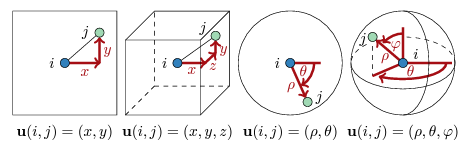

예를 들어, 아래의 MNIST 이미지는 일반적으로 28×28 차원 행렬로 표현된다. N=28*28=784 픽셀 집합으로 나타낼 수도 있습니다. 따라서 그래프 G는 N=784 노드를 가질 것이고 엣지는 가까운 위치의 픽셀에 대해 큰 값(아래 그림의 두꺼운 엣지)을 가질 것이고, 먼 픽셀에 대해 작은 값(얇은 엣지)을 가질 것이다.

실제로 CNN은 또한 이미지를 암묵적으로 그래프로 보는데, 여기서 각 픽셀(노드)은 인접 픽셀에 연결되지만 더 균일한 방식으로 연결된다. 아래 왼쪽 이미지에서 모든 픽셀은 8개의 인접 픽셀에 연결되어 있다. 인접 픽셀 2, 4, 5, 7은 동일한 유클리드 거리를 공유하며, 유사하게 인접 픽셀 1, 3, 6, 8은 중간 픽셀에 대각선으로 연결되어 있기 때문에 약간 더 큰 유클리드 거리를 공유한다.

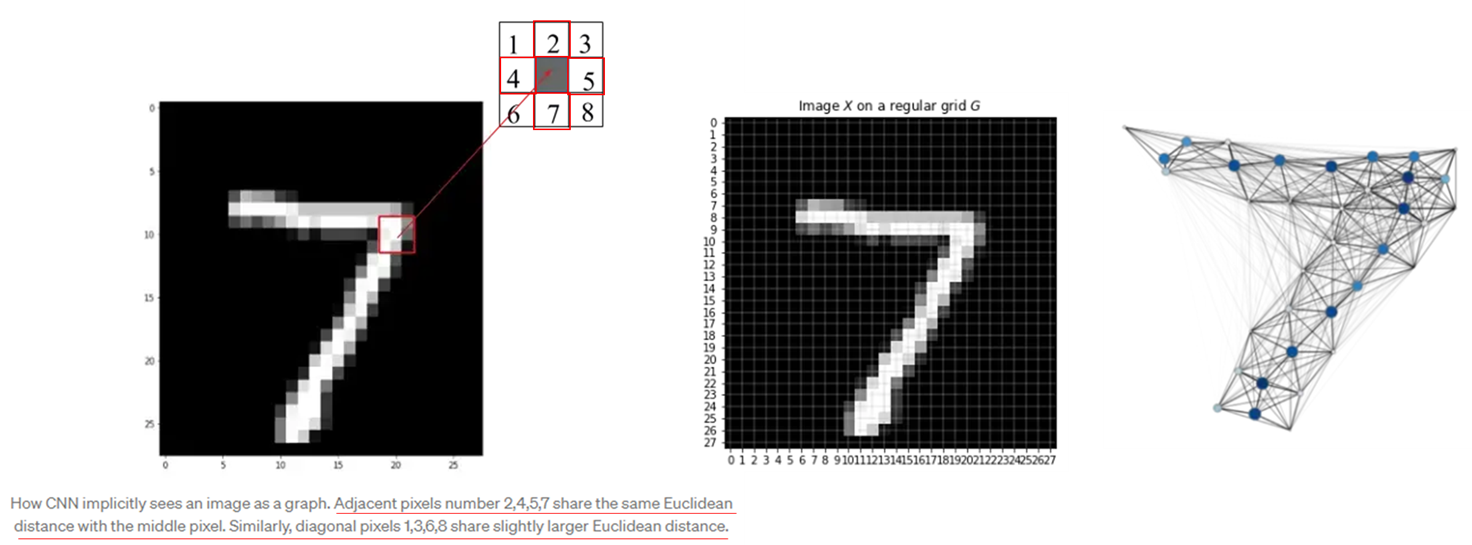

**Convolution operator**

kernel functions g = (g1, . . . , g_M_in) and input node features f, we define our spatial convolution operator for a node i as

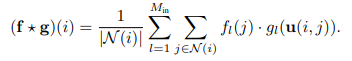

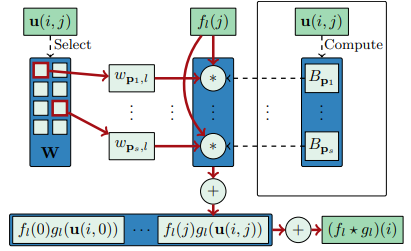

Forward computation scheme of the proposed convolution operation. During the backward step of the backpropagation algorithm, the gradient flows along the inverted solid arrows, reaching inputs from $W$ and $f_l(i)$.

PyG에서는 Tensor를 사용하므로...

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1, 1, 2],
                           [1, 0, 2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index)
>>> Data(edge_index=[2, 4], x=[3, 1])

SyntaxError: ignored

edge_index, 즉 모든 엣지의 소스 노드와 타겟 노드를 정의하는 텐서는, 인덱스 튜플의 리스트형이 아니다. 이런 식으로 인덱스를 작성하려면 데이터 생성자(data constructor)에게 전달하기 전에 그것을 전치(transpose)하고 연속적으로 호출해야 한다.

그래프에 엣지가 두 개 뿐이지만 엣지의 양방향을 설명하려면 네 개의 인덱스 튜플을 정의해야 한다.

In [ ]:
import torch
from torch_geometric.data import Data

edge_index = torch.tensor([[0, 1],
                           [1, 0],
                           [1, 2],
                           [2, 1]], dtype=torch.long)
x = torch.tensor([[-1], [0], [1]], dtype=torch.float)

data = Data(x=x, edge_index=edge_index.t().contiguous())

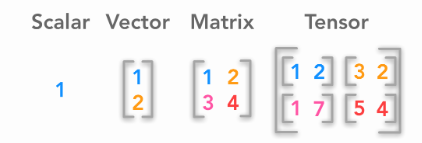

In [ ]:
import numpy as np

In [ ]:
# A tensor is a n-dimensional array with n > 2

x = np.array([[[1, 4, 7],
               [2, 5, 8],
               [3, 6, 9]],
              [[10, 40, 70],
               [20, 50, 80],
               [30, 60, 90]],
              [[100, 400, 700],
               [200, 500, 800],
               [300, 600, 900]]])

In [ ]:
x

array([[[  1,   4,   7],
        [  2,   5,   8],
        [  3,   6,   9]],

       [[ 10,  40,  70],
        [ 20,  50,  80],
        [ 30,  60,  90]],

       [[100, 400, 700],
        [200, 500, 800],
        [300, 600, 900]]])

In [ ]:
print(x.ndim)

3


## References

- [NetworkX](https://networkx.org/) : NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.
- [NetworkX Doc References](https://networkx.org/documentation/stable/reference/index.html)
- [NetworkX 설치와 기본 사용법](https://mindscale.kr/course/python-network-analysis/2/)
- [파이썬 NetworkX 사용법 - 예제](https://95pbj.tistory.com/34)
[NetworkX_Tutorial](https://networkx.github.io/documentation/stable/tutorial.html)
- [NetworkX_from_pandas_adjacency](https://networkx.github.io/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_adjacency.html)
- [NetworkX_Converting to and from other data formats](https://networkx.org/documentation/stable/reference/convert.html)
- [NetworkX_Linear algebra](https://networkx.org/documentation/stable/reference/linalg.html)
- [networkx_github](https://github.com/networkx/networkx)

---
- [파이토치(PYTORCH) 한국어 튜토리얼](https://tutorials.pytorch.kr/)
- [파이토치 데이터세트 샘플 설명](https://baeseongsu.github.io/posts/pytorch-geometric-introduction/)
- [PyG_Pytorch_geometric_Github](https://https://github.com/pyg-team/pytorch_geometric)
- [Graph 이론을  pytorch 로 GNN(Graph Neural Network) 추천사이트 소개](https://discuss.pytorch.kr/t/graph-pytorch/50)
- [Stanford CS224W Graph ML Tutorials](https://https://medium.com/stanford-cs224w)
- [Deep Learning Book Series · 2.1 Scalars Vectors Matrices and Tensors](https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/)


**[GNN의 한글 소개자료 / 공부 자료 모음]**

1. [GCN Basic of Graph Convolution Network - 딥러닝 홀로서기](https://www.youtube.com/watch?v=YL1jGgcY78U&t=1420s)

2. [Graph Attention Networks 소개 영상](https://www.youtube.com/watch?v=NSjpECvEf0Y&t=4150s)

3. [Machine Learning with Graphs (CS224W)](https://tobigs.gitbook.io/tobigs-graph-study/)

**[Stanford CS224W: Machine Learning with Graphs 2021]**

CS224W: Machine Learning with Graphs 2021
https://web.stanford.edu/class/cs224w/index.html

**Stanford CS224W: Machine Learning with Graphs - Fall 2021**
https://www.youtube.com/playlist?list=PLoROMvodv4rPLKxIpqhjhPgdQy7imNkDn

Graph Neural Networks (GNN) using Pytorch Geometric | Stanford University
https://youtu.be/-UjytpbqX4A

Graph Neural Networks - Colaboratory
https://colab.research.google.com/drive/1DIQm9rOx2mT1bZETEeVUThxcrP1RKqAn

Graph Representation Learning Book
https://www.cs.mcgill.ca/~wlh/grl_book/

Networks, Crowds, and Markets: Reasoning About a Highly Connected World
http://www.cs.cornell.edu/home/kleinber/networks-book/

Network Science by Albert-László Barabási
http://networksciencebook.com/

**[CS224W: Machine Learning with Graphs 2019]**

CS224W: Machine Learning with Graphs 2019
http://snap.stanford.edu/class/cs224w-2019/

**Stanford CS224W - Machine Learning with graphs- Fall 2019**
https://www.youtube.com/playlist?list=PL-Y8zK4dwCrQyASidb2mjj_itW2-YYx6-

Graph Neural Networks: Hands-on Session
https://colab.research.google.com/drive/1DIQm9rOx2mT1bZETEeVUThxcrP1RKqAn

- [Types of Graphs](https://medium.com/tebs-lab/types-of-graphs-7f3891303ea8)
- [Social Network Analysis of COVID-19 Sentiments: Application of Artificial Intelligence](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7438102/)
- [Implementations of Graphs](https://medium.com/tebs-lab/implementations-of-graphs-92eb7f121793)
- [Getting the Intuition of Graph Neural Networks](https://medium.com/analytics-vidhya/getting-the-intuition-of-graph-neural-networks-a30a2c34280d)
- [Tutorial on Graph Neural Networks for Computer Vision and Beyond](https://medium.com/@BorisAKnyazev/tutorial-on-graph-neural-networks-for-computer-vision-and-beyond-part-1-3d9fada3b80d)
- [Comparison of NN and GNN in terms of PyTorch code_Github/fc_vs_graph_train.py](https://github.com/bknyaz/examples/blob/master/fc_vs_graph_train.py)
- [Spectral Graph Convolution Explained and Implemented Step By Step](https://towardsdatascience.com/spectral-graph-convolution-explained-and-implemented-step-by-step-2e495b57f801)

**[Resources]**

**Libraries**
- https://networkit.github.io/
- https://github.com/danielegrattarola/spektral
- https://networkx.org/
- https://pytorch-geometric.readthedocs.io/en/latest/

**Resources: Starters:**
- https://www.kdnuggets.com/2018/05/wtf-tensor.html
- https://medium.com/tebs-lab/types-of-graphs-7f3891303ea8
- https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.1-Scalars-Vectors-Matrices-and-Tensors/
- https://towardsdatascience.com/an-introduction-to-graph-neural-network-gnn-for-analysing-structured-data-afce79f4cfdc
- https://towardsdatascience.com/understanding-graph-convolutional-networks-for-node-classification-a2bfdb7aba7b
- https://neptune.ai/blog/graph-neural-network-and-some-of-gnn-applications
- https://pub.towardsai.net/understanding-social-networks-409dffc785ea

**Advance:**
- https://towardsdatascience.com/hands-on-graph-neural-networks-with-pytorch-pytorch-geometric-359487e221a8
- https://medium.com/analytics-vidhya/getting-the-intuition-of-graph-neural-networks-a30a2c34280d
- https://medium.com/@BorisAKnyazev/tutorial-on-graph-neural-networks-for-computer-vision-and-beyond-part-1-3d9fada3b80d

**Examples**
-  https://graphsandnetworks.com/the-cora-dataset/

**Documentations**
- https://networkx.org/documentation/networkx-1.10/tutorial/tutorial.html
- https://pytorch-geometric.readthedocs.io/en/latest/notes/introduction.html

#**Adjacency Matrix**

**[의문점]** 영상 강의에서는 아래와 같이 설명하고 있는데 왜 무방향에서 B to A 가 12가 아니고 -1이 되어야 하는지가 잘 이해가 되지 않음. 무방향행렬은 대칭행렬이 되어야 하는 것이 아닌지???

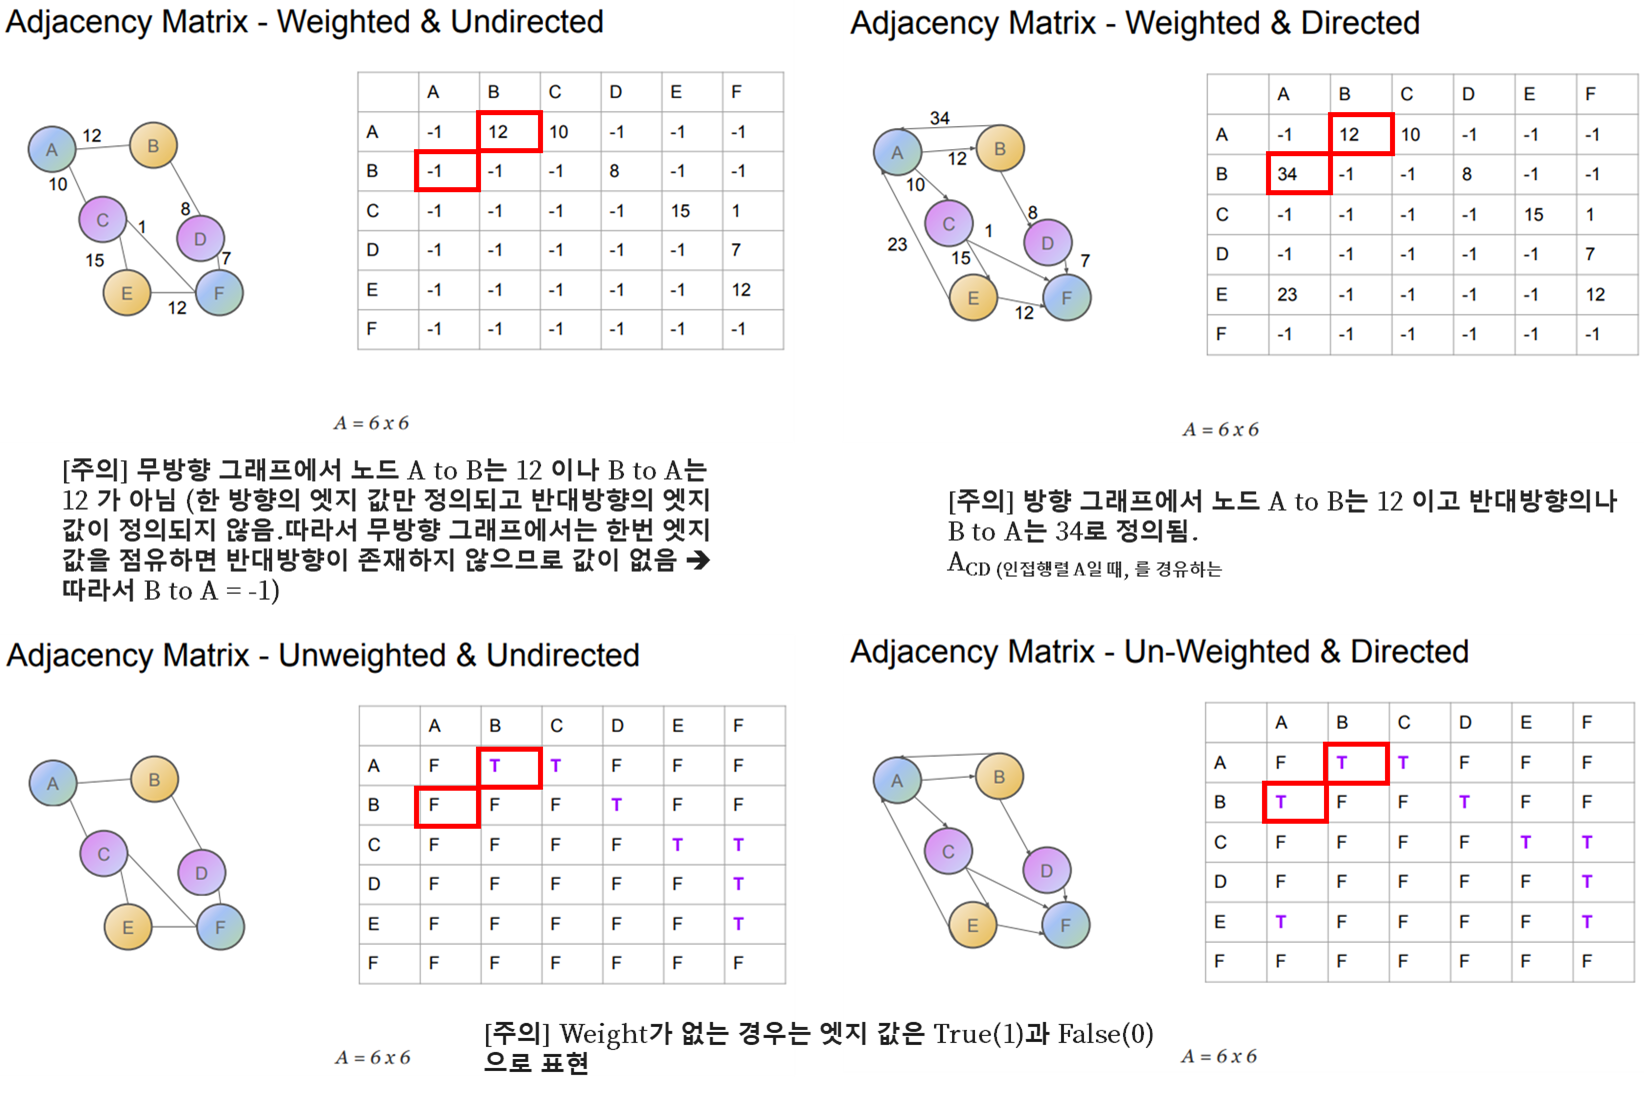

**[독학 내용] 올바로 잡기**

- 무방향 그래프의 인접행렬은 항상 대칭행렬이다.
- 무방향 그래프라는 것은 정점 a에서 b로 이동하는 간선이 있을 때 정점 b에서 a로 이동하는 간선 역시 항상 존재한다는 것을 의미하고, 그 역도 성립한다. 따라서 인접행렬 AA에 대해서 $A_{ab}$=$A_{ba}$ 가 항상 성립한다.
- 인접행렬의 모든 성분의 합은 그래프의 화살표의 개수와 같다. 이때, 무방향 간선은 양쪽으로 이어지므로 화살표 2개로 간주한다.
- 무방향 그래프에서 인접행렬의 모든 성분의 합은 간선의 개수의 2배이다


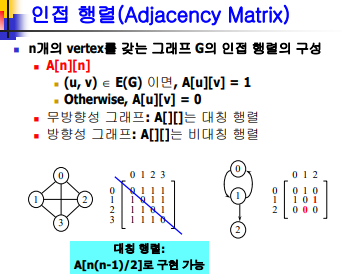

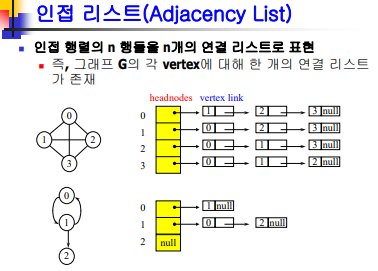

##**[인접행렬(Adjacency Matrix)]**

**[인접행렬(Adjacency Matrix)]** : 그래프를 이차원 배열로 나타내는 것.

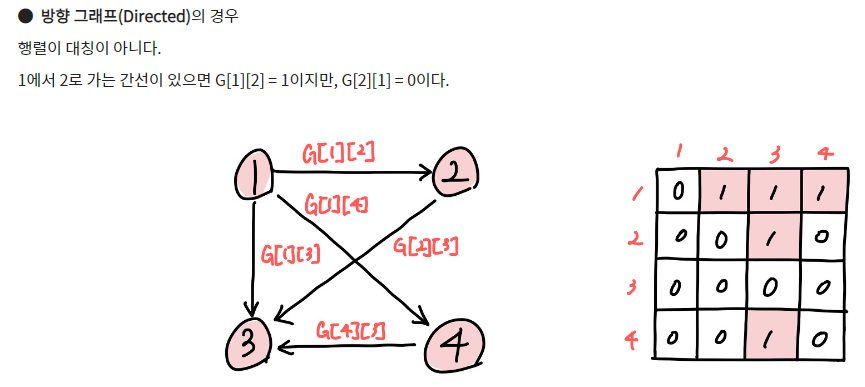

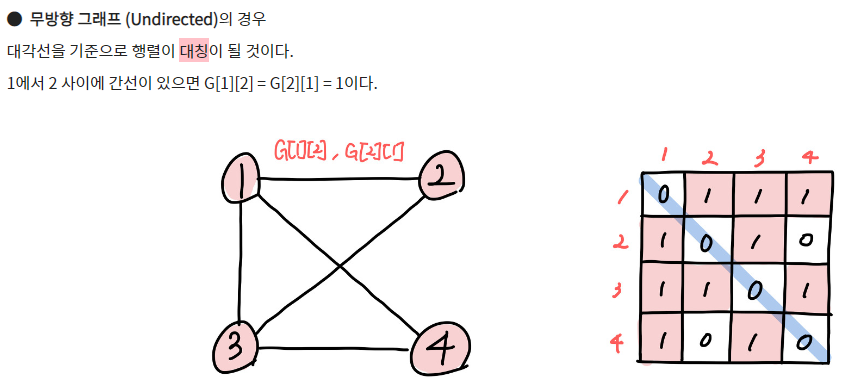

##**인접 리스트 (Adjacency List)**

인접 리스트 (Adjacency List)는 배열과 연결 리스트(Linked List)로 구현하는 리스트이다

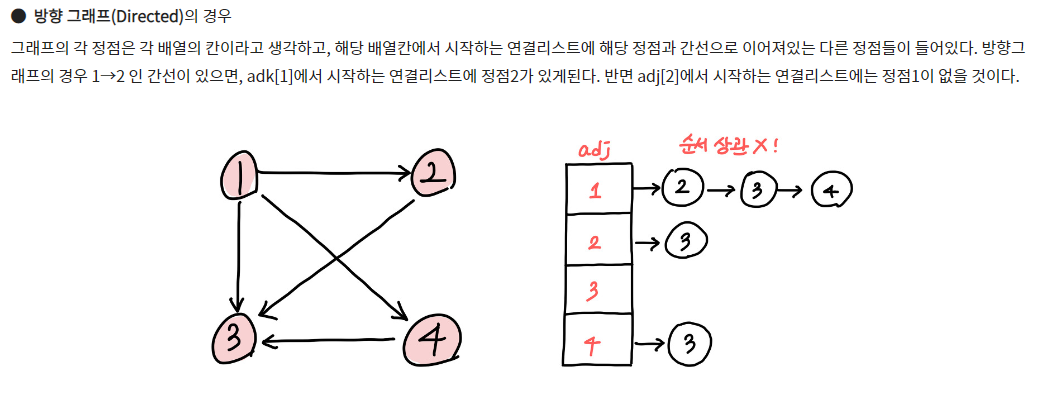

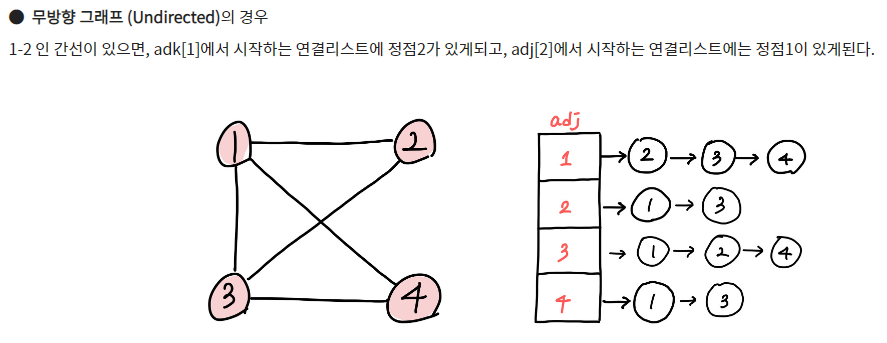

[EOD]